In [1]:
pip install imbalanced-learn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, accuracy_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv(r"C:\Users\chand\Desktop\Credit_Card_Fraud_Detection.csv")

In [4]:
data.shape

(690, 17)

<Axes: xlabel='class'>

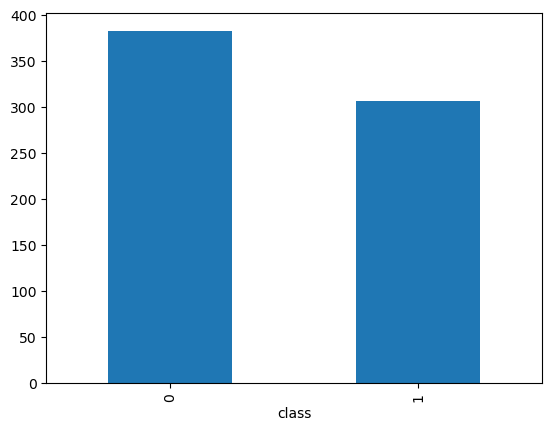

In [5]:
data['class'].value_counts().plot(kind='bar')

In [6]:
print(data.columns)

Index(['Unnamed: 0', 'Customer_ID', 'A_1', 'A_2', 'A_3', 'A_4', 'A_5', 'A_6',
       'A_7', 'A_8', 'A_9', 'A_10', 'A_11', 'A_12', 'A_13', 'A_14', 'class'],
      dtype='object')


In [7]:
display(data)

,Unnamed: 0,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,class
0,0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [8]:
data.duplicated().sum()

0

In [9]:
x=data.iloc[:,:-1]

In [10]:
display(x)

,Unnamed: 0,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14
0,0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213
1,1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1
2,2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1
3,3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1
4,4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1
686,686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45
687,687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1
688,688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12


In [11]:
y=data.iloc[:,-1]

In [12]:
display(y)

0      0
1      0
2      0
3      1
4      1
      ..
685    1
686    0
687    1
688    1
689    1
Name: class, Length: 690, dtype: int64

In [13]:
print("Class imbalance ratio:", y.value_counts().max() / y.value_counts().min())

Class imbalance ratio: 1.247557003257329


In [14]:
print("Class imbalance ratio:", y.value_counts().min() / y.value_counts().max())

Class imbalance ratio: 0.8015665796344648


In [15]:
smote= SMOTEENN(random_state=42)

In [16]:
X_res, y_res = smote.fit_resample(x, y)

Text(0, 0.5, 'Count')

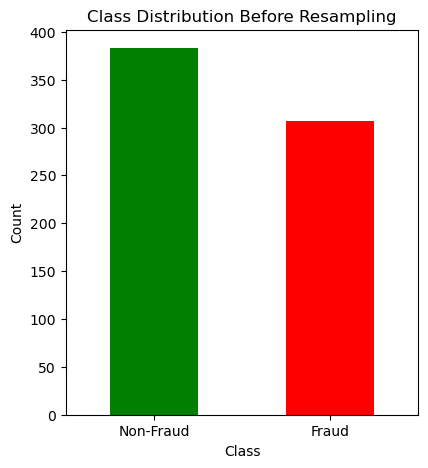

In [17]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Class Distribution Before Resampling")
y.value_counts().plot(kind='bar', color=['green', 'red'])
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)
plt.xlabel("Class")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

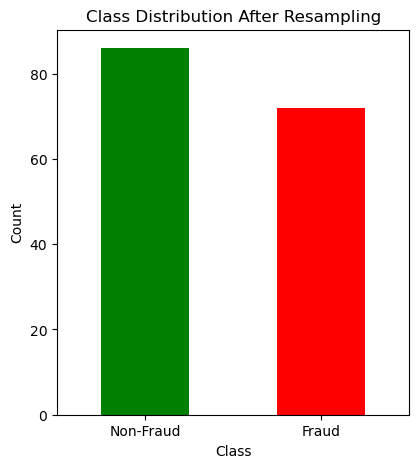

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.title("Class Distribution After Resampling")
y_res.value_counts().plot(kind='bar', color=['green', 'red'])
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)
plt.xlabel("Class")
plt.ylabel("Count")

In [19]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [20]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_res, y_res)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = clf.predict(x)
print(y_pred)

[1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0
 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0
 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0
 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1
 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1
 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1
 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1
 1 1 0 1 1 1 1 1 0 1 1 0 

In [22]:
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
classification_rep = classification_report(y, y_pred)

In [23]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.8985507246376812


In [24]:
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[345  38]
 [ 32 275]]


In [25]:
print(f"Classification Report:\n{classification_rep}")

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       383
           1       0.88      0.90      0.89       307

    accuracy                           0.90       690
   macro avg       0.90      0.90      0.90       690
weighted avg       0.90      0.90      0.90       690



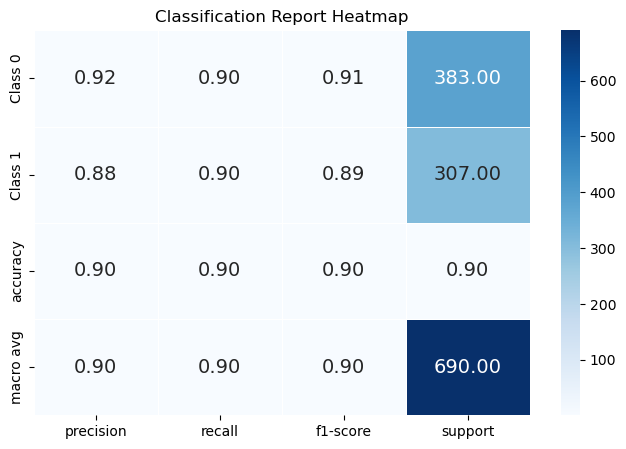

In [26]:
import seaborn as sns
class_rep = classification_report(y, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
class_rep_df = pd.DataFrame(class_rep).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(class_rep_df.iloc[:-1, :].astype(float), annot=True, cmap='Blues', fmt=".2f", linewidths=.5, annot_kws={"size": 14})
plt.title('Classification Report Heatmap')
plt.show()

In [27]:
from sklearn import metrics
score_under = {}
score_under["Random_Forest"] ={}
score_under["Random_Forest"]["Precision"]=metrics.precision_score(y,y_pred)*100
score_under["Random_Forest"]["Recall"]=metrics.recall_score(y,y_pred)*100
score_under["Random_Forest"]["Accuracy"]=metrics.accuracy_score(y,y_pred)*100

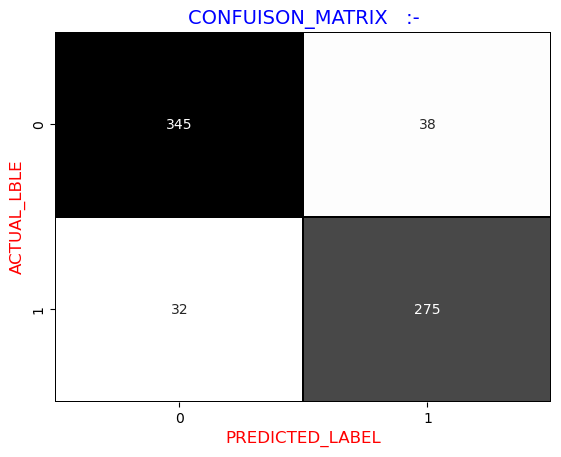

In [28]:
sns.heatmap(metrics.confusion_matrix(y,y_pred),annot=True,cbar=False
            ,cmap="Greys",fmt="1",linecolor="Black",linewidth=0.3)
plt.xlabel("PREDICTED_LABEL",fontsize=12,color='r')
plt.ylabel("ACTUAL_LBLE",fontsize=12,color='r')
plt.title("CONFUISON_MATRIX   :-",fontsize=14,color="b")
plt.show()

In [29]:
score_under["Decision_Tree"] ={}
score_under["Decision_Tree"]["Precision"]=metrics.precision_score(y,y_pred)*100
score_under["Decision_Tree"]["Recall"]=metrics.recall_score(y,y_pred)*100
score_under["Decision_Tree"]["Accuracy"]=metrics.accuracy_score(y,y_pred)*100

In [30]:
score_over = {}
score_over["Random_Forest"] ={}
score_over["Random_Forest"]["Precision"]=metrics.precision_score(y,y_pred)*100
score_over["Random_Forest"]["Recall"]=metrics.recall_score(y,y_pred)*100
score_over["Random_Forest"]["Accuracy"]=metrics.accuracy_score(y,y_pred)*100

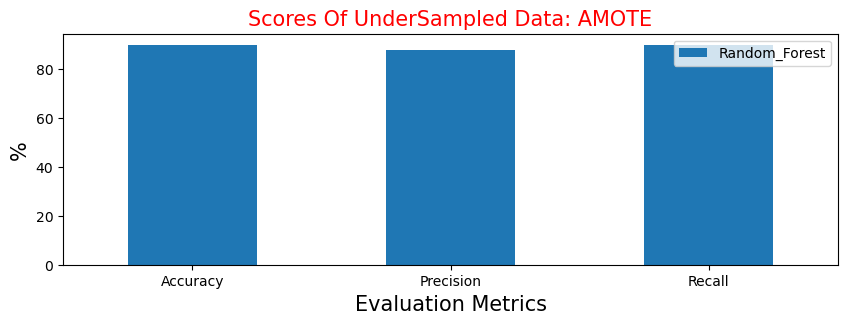

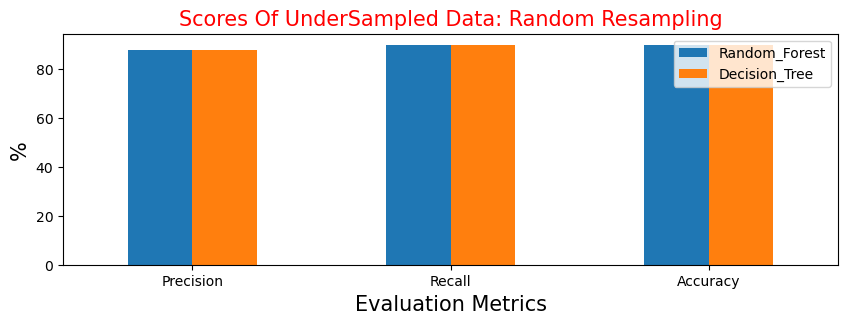

In [31]:
score_undersampling=pd.DataFrame(score_under)

score_oversampling=pd.DataFrame(score_over)
score_oversampling.plot(kind="bar",figsize=(10,3))

plt.xticks(rotation=(0))
plt.xlabel("Evaluation Metrics",fontsize=15)
plt.ylabel("%",fontsize=15)
plt.title("Scores Of UnderSampled Data: AMOTE",fontsize=15,color="Red")

score_undersampling.plot(kind="bar",figsize=(10,3))
plt.xticks(rotation=(0))
plt.xlabel("Evaluation Metrics",fontsize=15)
plt.ylabel("%",fontsize=15)
plt.title("Scores Of UnderSampled Data: Random Resampling",fontsize=15,color="Red")
plt.show()